In [1]:
                                                                                                                                                                                                                                                                        from math import sqrt
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('data/ashok_mar19_mar20.csv',index_col=0)
# dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['AT','BP','PM10','Benzene','Toluene','NH3','NO','NO2','NOx','RH','SR','WS','WD','Ozone','SO2','CO','PM2.5']
dataset.index.name = 'Date'
# mark all NA values with 0
dataset['PM2.5'].fillna(0, inplace=True)
# drop the first 24 hours
# dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('pollution.csv')


/home/rishotics/anaconda3/envs/rl3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


                     AT      BP    PM10  Benzene  Toluene     NH3    NO   NO2  \
Date                                                                            
19-03-2019 00:00  23.11  986.47  222.69    53.77   176.33  149.05  0.63  7.77   
20-03-2019 00:00  25.82  984.78  223.62    47.16   149.60  130.92  0.67  7.92   
21-03-2019 00:00  24.86  988.30  178.79    50.40   164.93  116.82  0.84  6.56   
22-03-2019 00:00  23.95  990.27  126.25    40.88   188.77  208.38  0.43  2.36   
23-03-2019 00:00  24.03  989.49  148.54    44.30   181.58  197.88  0.66  2.39   

                    NOx     RH     SR     WS     WD  Ozone    SO2    CO  \
Date                                                                      
19-03-2019 00:00  33.77  27.21  48.00  77.84  80.51  42.99  31.07  1.55   
20-03-2019 00:00  24.46  30.84  23.99  59.80  51.34  49.98  23.85  1.45   
21-03-2019 00:00   9.08  36.49   3.68  32.57  19.23  55.16  25.41  1.22   
22-03-2019 00:00   6.75  27.38   2.53  40.06  22.83  56.4

(367, 17)


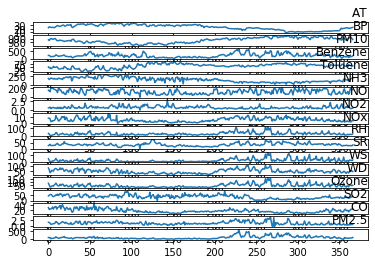

In [2]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values

print(values.shape)
# specify columns to plot
groups=[]
for i in range(values.shape[1]):
    groups.append(i)
# groups = [0, 1, 2, 3, 5, 6, 7,8,9,10,11,12,13,14,]
# print(groups)
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
#     print(group)
    pyplot.title(dataset.columns[group], y=1, loc='right')
    i += 1
# pyplot.plot(values[:,0])
# #     print(group)
# pyplot.title(dataset.columns[2], y=0.5, loc='right')
# pyplot.show()
# # values[:,0]

In [3]:
from numpy import array
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
    # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

n_hours=1
n_out= 1
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
print(values.shape)
scaled = scaler.fit_transform(values)
print(len(scaled))
X, y = split_sequences(scaled, n_hours, n_out)
# for i in range(0,1):
#     print(X[i], y[i])
print(X.shape,y.shape)

(367, 17)
367
(367, 1, 16) (367, 1)


In [21]:
a=[[1,2] ,[4, 5], [6, 7]]
b=[[2 ,3] ,[5, 6], [7 ,8]]
(np.sum((np.array(a)-np.array(b))**2,axis=0))

array([3, 3])

In [4]:

def MODEL(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features):
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_hours,n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(n_out))
    model.compile(optimizer='adam', loss='mse')
# fit model
    model.fit(train_X, train_y, epochs=200, batch_size=20, validation_data=(val_X, val_y), verbose=0, shuffle=False)
    yhat11 = model.predict(test_X, verbose=0)
    print("RMSE error using ",n_hours," state size to predict ",n_out," step is =", np.sqrt(((np.sum((yhat11-test_y)**2,axis=0)))))
    return(np.sqrt(((np.sum((yhat11-test_y)**2,axis=0)))))
def main(n_out_max,n_hour_max):
    dataset = read_csv('pollution.csv', header=0, index_col=0)
    values = dataset.values  
    values = values.astype('float32')
# normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    print(values.shape)
    scaled = scaler.fit_transform(values)
    print(len(scaled))
    result=np.zeros((n_out_max,n_hour_max),dtype=np.float32)
    for n_out in range (1,n_out_max+1):
        for n_hours in range(1,n_hour_max+1):
            print("Number of steps predicted= ",n_out,"Number of steps Multivariate threads ussed= ",n_hours)
            X, y = split_sequences(scaled, n_hours, n_out)
            train_X, train_y = X[0:300,:,:], y[0:300,:]
            val_X, val_y = X[300:330,:,:], y[300:330,:]
            test_X, test_y = X[330:,:,:], y[330:,:]
            print("train_X.shape, train_y.shape, test_X.shape, test_y.shape=",train_X.shape, train_y.shape, test_X.shape, test_y.shape)
            print("val X, val y",val_X.shape, val_y.shape)
            n_features = X.shape[2]
            error=MODEL(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features)
            result[n_out-1,n_hours-1]=error
      
    return result
            
            
            
            
n_out_max,n_hour_max= 10,5

            
        
        
        
        
        
        
    

# r5=main(5,10)


In [5]:
out_range=[10]
# result=np.zeros((len(out_range),10),dtype=np.float32)
result= []
for i,k in enumerate(out_range):
    for j in range(1,31):
        for m in range(10,11):
            n_out=k
            n_hours=m
            print("Number of steps predicted= ",n_out,"Number of steps Multivariate threads ussed= ",n_hours, "iteration number= ",j)
            X, y = split_sequences(scaled, n_hours, n_out)
            train_X, train_y = X[0:300,:,:], y[0:300,:]
            val_X, val_y = X[300:330,:,:], y[300:330,:]
            test_X, test_y = X[330:,:,:], y[330:,:]
            print("train_X.shape, train_y.shape, test_X.shape, test_y.shape=",train_X.shape, train_y.shape, test_X.shape, test_y.shape)
            print("val X, val y",val_X.shape, val_y.shape)
            n_features = X.shape[2]
            error=MODEL(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features)
#             result[i,m-1]=result[i,m-1]+error
            result.append(error)
            
        
result



            
            
            
    
    
            
            

W0428 21:22:51.797801 140103776818944 deprecation_wrapper.py:119] From /home/rishotics/anaconda3/envs/rl3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



Number of steps predicted=  10 Number of steps Multivariate threads ussed=  10 iteration number=  1
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (300, 10, 16) (300, 10) (19, 10, 16) (19, 10)
val X, val y (30, 10, 16) (30, 10)


W0428 21:22:52.222983 140103776818944 deprecation_wrapper.py:119] From /home/rishotics/anaconda3/envs/rl3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0428 21:22:52.276695 140103776818944 deprecation_wrapper.py:119] From /home/rishotics/anaconda3/envs/rl3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0428 21:22:52.960527 140103776818944 deprecation_wrapper.py:119] From /home/rishotics/anaconda3/envs/rl3.6/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0428 21:22:53.406906 140103776818944 deprecation.py:323] From /home/rishotics/anaconda3/envs/rl3.6/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.p

RMSE error using  10  state size to predict  10  step is = [0.20034182 0.33881122 0.5200385  0.5850046  0.68696684 0.72483313
 0.78526527 0.7897293  0.9035428  0.94457084]
Number of steps predicted=  10 Number of steps Multivariate threads ussed=  10 iteration number=  2
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (300, 10, 16) (300, 10) (19, 10, 16) (19, 10)
val X, val y (30, 10, 16) (30, 10)
RMSE error using  10  state size to predict  10  step is = [0.30807194 0.38168168 0.8367463  0.8751943  1.0701327  1.2820355
 1.3337386  1.2264359  1.2826004  1.1460423 ]
Number of steps predicted=  10 Number of steps Multivariate threads ussed=  10 iteration number=  3
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (300, 10, 16) (300, 10) (19, 10, 16) (19, 10)
val X, val y (30, 10, 16) (30, 10)
RMSE error using  10  state size to predict  10  step is = [0.2250489  0.3305758  0.41858405 0.56989104 0.73221385 0.8123208
 0.7953591  0.7384211  0.69034517 0.5715454 ]
Number o

RMSE error using  10  state size to predict  10  step is = [0.31549612 0.47765788 0.5630664  0.6753829  0.82253087 0.9079765
 1.0010601  1.0941838  1.0407902  0.91511357]
Number of steps predicted=  10 Number of steps Multivariate threads ussed=  10 iteration number=  22
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (300, 10, 16) (300, 10) (19, 10, 16) (19, 10)
val X, val y (30, 10, 16) (30, 10)
RMSE error using  10  state size to predict  10  step is = [0.31083485 0.3721489  0.45026097 0.53459376 0.542577   0.6488359
 0.73775434 0.73527896 0.6981323  0.6381977 ]
Number of steps predicted=  10 Number of steps Multivariate threads ussed=  10 iteration number=  23
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (300, 10, 16) (300, 10) (19, 10, 16) (19, 10)
val X, val y (30, 10, 16) (30, 10)
RMSE error using  10  state size to predict  10  step is = [0.2751789  0.39514908 0.43891743 0.5620042  0.7828944  0.73253345
 0.79535294 0.8171892  0.7802602  0.80785924]
Number

[array([0.20034182, 0.33881122, 0.5200385 , 0.5850046 , 0.68696684,
        0.72483313, 0.78526527, 0.7897293 , 0.9035428 , 0.94457084],
       dtype=float32),
 array([0.30807194, 0.38168168, 0.8367463 , 0.8751943 , 1.0701327 ,
        1.2820355 , 1.3337386 , 1.2264359 , 1.2826004 , 1.1460423 ],
       dtype=float32),
 array([0.2250489 , 0.3305758 , 0.41858405, 0.56989104, 0.73221385,
        0.8123208 , 0.7953591 , 0.7384211 , 0.69034517, 0.5715454 ],
       dtype=float32),
 array([0.27344057, 0.34253514, 0.4412148 , 0.51897526, 0.5813253 ,
        0.6983076 , 0.73166496, 0.86495453, 0.8817437 , 0.7919275 ],
       dtype=float32),
 array([0.2854039 , 0.45598707, 0.6567727 , 0.7865968 , 0.9220761 ,
        1.0600396 , 1.01565   , 1.0657377 , 1.0660195 , 1.088629  ],
       dtype=float32),
 array([0.21152608, 0.40452152, 0.5814931 , 0.6700972 , 0.78484374,
        0.84928423, 1.0516541 , 1.0478642 , 1.1463804 , 1.1939424 ],
       dtype=float32),
 array([0.2761302 , 0.38183922, 0.498864

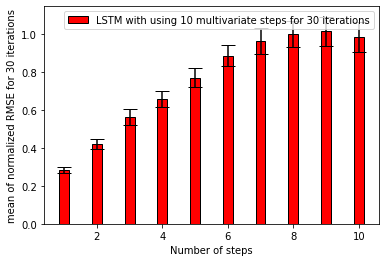

In [13]:
r=[([0.20034182, 0.33881122, 0.5200385 , 0.5850046 , 0.68696684,
        0.72483313, 0.78526527, 0.7897293 , 0.9035428 , 0.94457084]
        ),
 ([0.30807194, 0.38168168, 0.8367463 , 0.8751943 , 1.0701327 ,
        1.2820355 , 1.3337386 , 1.2264359 , 1.2826004 , 1.1460423 ]
        ),
 ([0.2250489 , 0.3305758 , 0.41858405, 0.56989104, 0.73221385,
        0.8123208 , 0.7953591 , 0.7384211 , 0.69034517, 0.5715454 ]
        ),
 ([0.27344057, 0.34253514, 0.4412148 , 0.51897526, 0.5813253 ,
        0.6983076 , 0.73166496, 0.86495453, 0.8817437 , 0.7919275 ]
        ),
 ([0.2854039 , 0.45598707, 0.6567727 , 0.7865968 , 0.9220761 ,
        1.0600396 , 1.01565   , 1.0657377 , 1.0660195 , 1.088629  ]
        ),
 ([0.21152608, 0.40452152, 0.5814931 , 0.6700972 , 0.78484374,
        0.84928423, 1.0516541 , 1.0478642 , 1.1463804 , 1.1939424 ]
        ),
 ([0.2761302 , 0.38183922, 0.4988646 , 0.5775717 , 0.6435959 ,
        0.7898728 , 0.8732284 , 0.9184805 , 0.9331998 , 0.85606885]
        ),
 ([0.26696786, 0.48581216, 0.58429694, 0.6775587 , 0.6519922 ,
        0.72712773, 0.82037157, 0.7820186 , 0.8178634 , 0.7575715 ]
        ),
 ([0.26988983, 0.41726047, 0.559696  , 0.7062855 , 0.7995648 ,
        0.97747105, 0.9553131 , 1.1619477 , 1.1761483 , 1.2625716 ]
        ),
 ([0.2377563 , 0.36584154, 0.5264625 , 0.7054058 , 0.91951925,
        1.012539  , 1.1619767 , 1.0898815 , 1.0725706 , 1.0062009 ]
        ),
 ([0.3266622 , 0.54629093, 0.7098405 , 0.83127874, 0.9856522 ,
        1.0881822 , 1.1963266 , 1.1820642 , 1.2437829 , 1.1329777 ]
        ),
 ([0.35330588, 0.36503983, 0.3968098 , 0.4791437 , 0.63218004,
        0.71989596, 0.69065803, 0.8254375 , 0.7472695 , 0.75553167]
        ),
 ([0.2829264 , 0.31899843, 0.47485065, 0.6003763 , 0.6950644 ,
        0.7209486 , 0.7825339 , 0.8013272 , 0.9023954 , 0.947199  ]
        ),
 ([0.2632193 , 0.4710039 , 0.725713  , 0.76183516, 0.90332884,
        0.9855458 , 1.0067146 , 1.0660313 , 1.1577396 , 1.117535  ]
        ),
 ([0.38526258, 0.41401318, 0.4541162 , 0.49334523, 0.50861466,
        0.6262029 , 0.65834135, 0.7357129 , 0.72550184, 0.7183588 ]
        ),
 ([0.3343722 , 0.5986937 , 0.8190069 , 0.8462723 , 0.91964465,
        1.0144287 , 1.1521233 , 1.2474666 , 1.2412664 , 1.2223648 ]
        ),
 ([0.26536652, 0.3791604 , 0.60457224, 0.71037596, 0.9022294 ,
        0.9920516 , 1.1693525 , 1.2989395 , 1.3183475 , 1.3214325 ]
        ),
 ([0.26379222, 0.39938617, 0.53243566, 0.6713251 , 0.80961555,
        0.9916968 , 1.1318637 , 1.2205409 , 1.3004705 , 1.2449119 ]
        ),
 ([0.35338175, 0.5846072 , 0.70537347, 0.6804997 , 0.7867149 ,
        0.9017146 , 0.9664548 , 1.0052164 , 0.86759984, 0.77151656]
        ),
 ([0.26823226, 0.40707952, 0.49501005, 0.5023469 , 0.62636036,
        0.78670585, 0.78893465, 0.8352305 , 0.8296241 , 0.74078256]
        ),
 ([0.31549612, 0.47765788, 0.5630664 , 0.6753829 , 0.82253087,
        0.9079765 , 1.0010601 , 1.0941838 , 1.0407902 , 0.91511357]
        ),
 ([0.31083485, 0.3721489 , 0.45026097, 0.53459376, 0.542577  ,
        0.6488359 , 0.73775434, 0.73527896, 0.6981323 , 0.6381977 ]
        ),
 ([0.2751789 , 0.39514908, 0.43891743, 0.5620042 , 0.7828944 ,
        0.73253345, 0.79535294, 0.8171892 , 0.7802602 , 0.80785924]
        ),
 ([0.25809628, 0.42089254, 0.51767236, 0.67367905, 0.8131786 ,
        0.9447398 , 1.0778269 , 1.1405553 , 1.1257752 , 1.0573056 ]
        ),
 ([0.24172668, 0.41135943, 0.493406  , 0.61231196, 0.6904887 ,
        0.88286096, 1.025979  , 1.1392004 , 1.1879538 , 1.2473799 ]
        ),
 ([0.23193674, 0.50435746, 0.7078798 , 0.89490426, 0.91562176,
        1.1241685 , 1.2820511 , 1.2874111 , 1.3601531 , 1.3764406 ]
        ),
 ([0.30126262, 0.4456791 , 0.60327697, 0.74232626, 0.90990275,
        1.0876    , 1.2185087 , 1.2461818 , 1.2782595 , 1.265386  ]
        ),
 ([0.31027427, 0.38795918, 0.6009814 , 0.70022845, 0.76867473,
        0.93593824, 1.0923387 , 1.1543494 , 1.2164568 , 1.16586   ]
        ),
 ([0.33039626, 0.41320726, 0.4355554 , 0.46240142, 0.62960154,
        0.7740374 , 0.81389314, 0.76478565, 0.6665894 , 0.70852864]
        ),
 ([0.21651195, 0.39641827, 0.560494  , 0.6548392 , 0.7031944 ,
        0.81132257, 0.834509  , 0.77011514, 0.7847388 , 0.7941097 ]
        )]
r_new=np.reshape(r,(30,10))
show_results(r_new)

TypeError: Input z must be at least a 2x2 array.

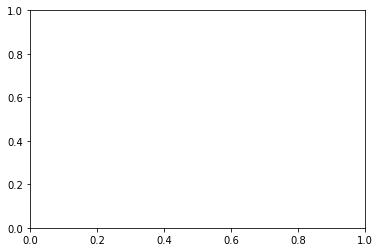

In [9]:
import matplotlib.pyplot as plt
# n_out_max=3
xlist = np.linspace(1, n_out_max, n_out_max)
ylist = np.linspace(1, n_out_max, n_out_max)
X, Y = np.meshgrid(xlist, ylist)
# Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, r)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Number of steps used in multivariate analysis x ')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('Number of steps predicted y')
plt.show()
print("Normalized RMSE Test")

In [6]:
out_range=[1]
# result=np.zeros((len(out_range),10),dtype=np.float32)
result1= []
for i,k in enumerate(out_range):
    for j in range(1,31):
        for m in range(10,11):
            n_out=k
            n_hours=m
            print("Number of steps predicted= ",n_out,"Number of steps Multivariate threads ussed= ",n_hours, "iteration number= ",j)
            X, y = split_sequences(scaled, n_hours, n_out)
            train_X, train_y = X[0:300,:,:], y[0:300,:]
            val_X, val_y = X[300:330,:,:], y[300:330,:]
            test_X, test_y = X[330:,:,:], y[330:,:]
            print("train_X.shape, train_y.shape, test_X.shape, test_y.shape=",train_X.shape, train_y.shape, test_X.shape, test_y.shape)
            print("val X, val y",val_X.shape, val_y.shape)
            n_features = X.shape[2]
            error=MODEL(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features)
#             result[i,m-1]=result[i,m-1]+error
            result1.append(error)
            
        
result1



            
            
            
    
    
            
            

Number of steps predicted=  1 Number of steps Multivariate threads ussed=  10 iteration number=  1
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (300, 10, 16) (300, 1) (28, 10, 16) (28, 1)
val X, val y (30, 10, 16) (30, 1)
RMSE error using  10  state size to predict  1  step is = [0.24566649]
Number of steps predicted=  1 Number of steps Multivariate threads ussed=  10 iteration number=  2
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (300, 10, 16) (300, 1) (28, 10, 16) (28, 1)
val X, val y (30, 10, 16) (30, 1)
RMSE error using  10  state size to predict  1  step is = [0.2276008]
Number of steps predicted=  1 Number of steps Multivariate threads ussed=  10 iteration number=  3
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (300, 10, 16) (300, 1) (28, 10, 16) (28, 1)
val X, val y (30, 10, 16) (30, 1)
RMSE error using  10  state size to predict  1  step is = [0.23614621]
Number of steps predicted=  1 Number of steps Multivariate threads ussed=  10 itera

RMSE error using  10  state size to predict  1  step is = [0.20964105]
Number of steps predicted=  1 Number of steps Multivariate threads ussed=  10 iteration number=  28
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (300, 10, 16) (300, 1) (28, 10, 16) (28, 1)
val X, val y (30, 10, 16) (30, 1)
RMSE error using  10  state size to predict  1  step is = [0.22994502]
Number of steps predicted=  1 Number of steps Multivariate threads ussed=  10 iteration number=  29
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (300, 10, 16) (300, 1) (28, 10, 16) (28, 1)
val X, val y (30, 10, 16) (30, 1)
RMSE error using  10  state size to predict  1  step is = [0.23296183]
Number of steps predicted=  1 Number of steps Multivariate threads ussed=  10 iteration number=  30
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (300, 10, 16) (300, 1) (28, 10, 16) (28, 1)
val X, val y (30, 10, 16) (30, 1)
RMSE error using  10  state size to predict  1  step is = [0.23578304]


[array([0.24566649], dtype=float32),
 array([0.2276008], dtype=float32),
 array([0.23614621], dtype=float32),
 array([0.20994133], dtype=float32),
 array([0.23181385], dtype=float32),
 array([0.2174799], dtype=float32),
 array([0.23601352], dtype=float32),
 array([0.24607491], dtype=float32),
 array([0.2827531], dtype=float32),
 array([0.2336011], dtype=float32),
 array([0.2366209], dtype=float32),
 array([0.21592721], dtype=float32),
 array([0.21965441], dtype=float32),
 array([0.21170294], dtype=float32),
 array([0.21128608], dtype=float32),
 array([0.24130218], dtype=float32),
 array([0.24702422], dtype=float32),
 array([0.2624123], dtype=float32),
 array([0.23324983], dtype=float32),
 array([0.2149824], dtype=float32),
 array([0.24717388], dtype=float32),
 array([0.20997496], dtype=float32),
 array([0.23615707], dtype=float32),
 array([0.23473643], dtype=float32),
 array([0.24208128], dtype=float32),
 array([0.22756201], dtype=float32),
 array([0.20964105], dtype=float32),
 array([

In [6]:
import numpy as np
r1=[([0.24566649]),
 ([0.2276008]),
 ([0.23614621]),
 ([0.20994133]),
 ([0.23181385]),
 ([0.2174799]),
 ([0.23601352]),
 ([0.24607491]),
 ([0.2827531]),
 ([0.2336011]),
 ([0.2366209]),
 ([0.21592721]),
 ([0.21965441]),
 ([0.21170294]),
 ([0.21128608]),
 ([0.24130218]),
 ([0.24702422]),
 ([0.2624123]),
 ([0.23324983]),
 ([0.2149824]),
 ([0.24717388]),
 ([0.20997496]),
 ([0.23615707]),
 ([0.23473643]),
 ([0.24208128]),
 ([0.22756201]),
 ([0.20964105]),
 ([0.22994502]),
 ([0.23296183]),
 ([0.23578304])]
r1_new=np.reshape(r1,(30,1))


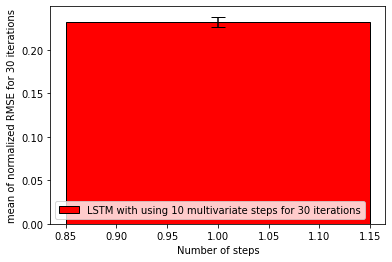

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
def show_results(r):
    x = datetime.datetime.now()
    u=np.mean(r,axis=0)
    sigma=np.std(r,axis=0)
    lower_bar= u-1.96*(sigma/(np.sqrt(r.shape[0])))
    upper_bar= u+1.96*(sigma/(np.sqrt(r.shape[0])))
    barWidth = 0.3
    bars1=u
    rl= np.arange(len(bars1))+1
    plt.bar(rl, bars1, width = barWidth, color = 'red', edgecolor = 'black', yerr=1.96*(sigma/(np.sqrt(r.shape[0]))), capsize=7, label='LSTM with using 10 multivariate steps for 30 iterations')
    plt.ylabel('mean of normalized RMSE for 30 iterations')
    plt.xlabel('Number of steps')
    plt.legend()
    plt.show()
    np.savetxt("10i_"+str(r.shape[1])+"o_LSTM_"+str(r.shape[0])+"i.csv"+str(datetime.datetime.now()), r, delimiter=",")
show_results(r1_new)

In [38]:
r1

array([0, 1, 2, 3, 4])

In [17]:
result

array([[0.2541837 , 0.26579684, 0.2604773 , 0.25040698, 0.24519286,
        0.24658175, 0.24238832, 0.23939247, 0.24469773, 0.24137458],
       [1.7007128 , 1.4102083 , 1.358139  , 1.2844536 , 1.3937747 ,
        1.428324  , 1.2712075 , 1.1904434 , 1.1103134 , 1.0317192 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

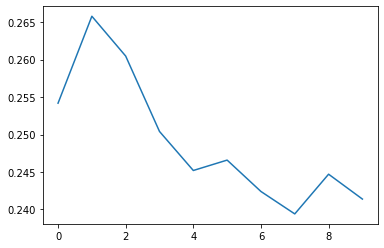

In [18]:
plt.plot(result[0])

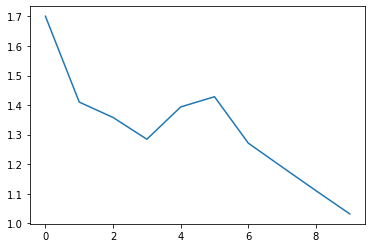

In [19]:
plt.plot(result[1])

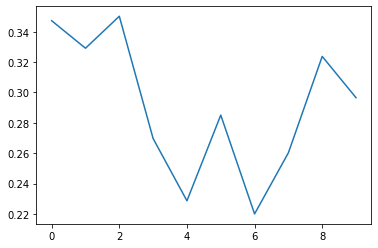

In [22]:
plt.plot(result[0])